# Linear Models in Machine Learning on Python - Support Vector Machines 1

Welcome to the 11th notebook on Machine Learning. In this notebook we will learn a new classification algorithm called Support Vector Machines which is one of my favorite algorithms. I guess it is because of that I learnt this algorithm when I was taking Calculus 2 classes. Probably I learnt the algorithm while I was learning about Lagrange Multipliers and seeing direct application of Lagrange Multipliers affected me a bit to like this algorithm that much. Whatevs let get started...

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
import warnings
warnings.filterwarnings('ignore', module='sklearn')
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import cross_validate
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

# Mathematics Behind Support Vector Machines.

I will introduce the algorithm in three parts.
1. In the first part, I will introduce how the algorithm works with help of some illustrations that I made.
2. In the second part, I will introduce some important mathematical concepts that we need to have an idea about in order to understand the mathematics under the hood.
3. In the third part we will dive deep into mathematics behind the algorithm and see how the idea in the first part can be achieved by using the concepts in the second part with the help of some other mathematical concepts.

## Part 1: Algorithm behind SVM

A Support Vector Machine classifier tries to find a hyperplane that maximizes the distance between two classes (sometimes you can also see that it maximizes the margin which is the same thing). Here, we define the hyperplane in terms of support vectors. Let's see what those mean.

The algorithm firstly fits a randomized line which is the main seperator of the data (a.k.a hyperplane) that doesn't seperate the data well just like the one below.

<div>
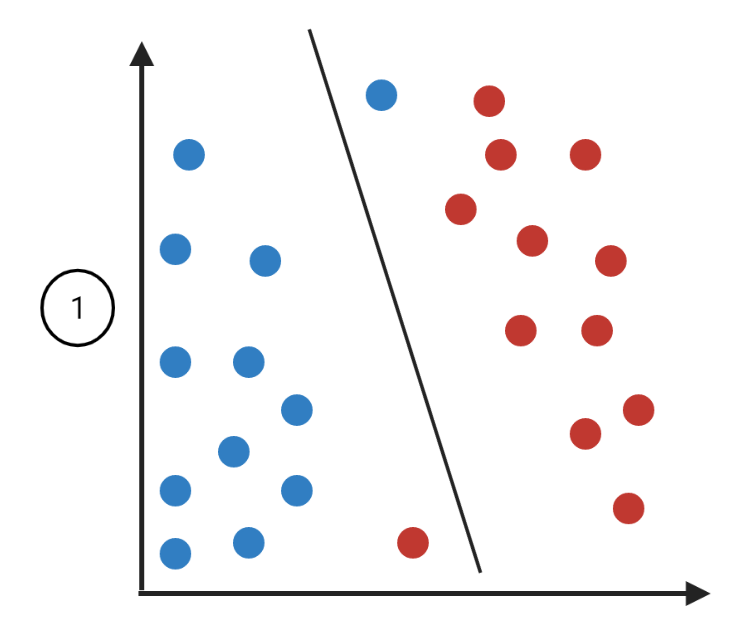
</div>


Then the algorithm find the closes point by using a distance metric which I stated below.

$$Distance=\:\frac{\left|W^Tx+b\right|}{\left|\left|w\right|\right|}$$

We will put our support vectors to these closest points.

<div>
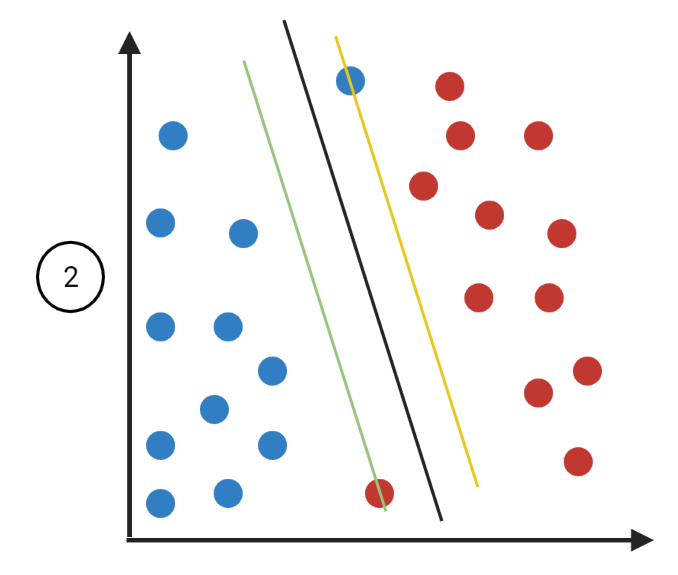
</div>

The blue and red points on the green and yellow lines are called our vectors. The algorithm tries to find the closest vectors by calculating the perpendicular distance and then put our margins (support vectors) on the vectors. Thereafter, what the algorithm does is to try maximizing the distance between two support vectors (green and yellow lines) and seperate the each class perfectly. We do this by changing our weights and bias vectors and find optimal support vectors. Finally, we get optimal support vectors and classify each class.

<div>
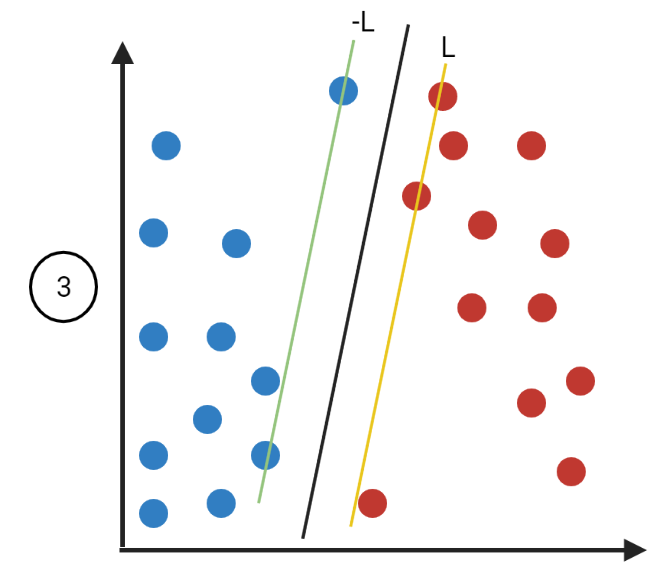
</div>

At this point I recommend watching Statquest's video about SVM to have a better intuitive understanding of how the algorithm works [link](https://www.youtube.com/watch?v=efR1C6CvhmE&t=23s)

## Part 2: Some Background
But wait ? How did we do all the calculations and optimize the support vectors ? To understand this, I think we firstly need to spend some time on two important concept
1. Lagrange Multipliers
2. Duality

### Lagrange Multipliers

Sometimes we want to find extreme values of a function which is constained by subset of the plane. For instance, let's say that we are interested in finding the points that are on the hyperbolic below which are closest to the origin.

<div>
<img src="https://upload.wikimedia.org/wikipedia/commons/8/82/Hyperbolic_Cylinder_Quadric.png" width="300">
</div>

To solve this problem we can use a method called Lagrange Multipliers. The method states that the local extreme values of a function $f\left(x,y,z\right)$ whose variables are subject to a constraint $g\left(x,y,z\right)=0$ are to be found on the surface $g=0$ among the point where

$$∇f=\lambda ∇g$$

for some scalar $\lambda$. This scalar is called Lagrange multiplier. 


I took this definition from Thomas Calculus and it can be hard for someone who doesn't have experience with calculus to understand this concept. I find videos on KhanAcedemy very instructive, therefore, I recommend watching them if you have trouble with the concept of Lagrange Multipliers. I think It's especially important to watch the video titled as Meaning of Lagrange Multipliers [link](https://www.youtube.com/watch?v=yuqB-d5MjZA&list=PLCg2-CTYVrQvNGLbd-FN70UxWZSeKP4wV&index=1). I also recommend watching this video [link](https://www.youtube.com/watch?v=8mjcnxGMwFo)

### Duality

Another important concept for understanding SVM is duality. In optimization there is concept called constraint relaxation which is used to eleminate  the constraints of an optimization problem. By extension of constraint relaxation we can derive another concept called Duality. Duality is a concept of solving an optimization problem from two different perspectrives, by using something called Dual Function we will see that we can convert an minimization problem into a maximization problem.  For instance, let's say that we have the following minimization problem below.

$$min\:f\left(x\right)$$


$$\:subject\:to\:$$

$$h\left(x\right)=0$$


For the minimization problem above we can derive a function called Lagrangian Function. This function can be defined by combining the function that we want to minimize, constraints and dual variables.

$$L\left(x,\lambda \right)=f\left(x\right)+\sum _{i=0}^m\left(\lambda_i\cdot h\left(x\right)\right)$$

The parameter $\lambda $ is called dual variable. By combining the function that we want to minimize (or it may be a maximization problem in another case) and contraints multiplied by dual variables we construct our Lagrangian Function. Moreover, the dual variable ($\lambda $) is actually a lagrange multiplier so here in fact we are trying to find extreme values of an function which is constrained by another one. By using the Lagrangian Function above we can derive another function called Dual Function.

$$\:q\left(\lambda \right)=min\:L\left(x,\lambda \:\right)\:=f\left(x\right)+\sum_{i=0}^m\left(\lambda_i\cdot \:\:h\left(x\right)\right)$$

In the equation above dual function is denoted by $q\left(\lambda \right)$ and it is not parameterized by $x$. At this point we also start calling $x$ primal variable since it is related to the first problem (a.k.a primal problem). Instead of minimizing the first function we can maximize the dual function and this is called dual problem. And we call the first problem of minimizing$\:f\left(x\right)$ as our primal problem. <br>

$$max_{\lambda }\left(q\left(\lambda \right)\right)$$

Minimizing $\:f\left(x\right)$ or maximizing $q\left(\lambda \:\right)$ yields to the same result. However, in some cases one of these problems is easier to solve and using duality, as we will see in the case of SVM, will provide us some other methods called kernels that can be used for improving classification performance.


**Additional Notes:** I wanted to summarize Lagrange Multipliers and Duality but even for summarizing these concepts I do think I need to introduce some other topics like Weak Duality, Strong Duality or the Orthogonal Gradient Theorem etc because without understanding these theorems I feel like there are some gaps in our understanding of Duality or Lagrange Multipliers however, since this notebook will already be full of mathematics I chose not to mention these things here. On the other hand, you can find more about those in the links that I shared below.

Articles: [Duality: The unsung hero of optimization explained through an example](https://towardsdatascience.com/duality-the-unsung-hero-of-optimization-explained-through-an-example-f53f3fb191d9)

Videos: [Lagrangian Duality and Convex Optimization](https://www.youtube.com/watch?v=thuYiebq1cE) [Lecture 14 | Lagrange Dual Function](https://www.youtube.com/watch?v=Qneah_lyQ0o)

Course Notes: [Support Vector Machines- Dual formulation and Kernel Trick](https://www.cs.cmu.edu/~aarti/Class/10315_Fall20/lecs/svm_dual_kernel.pdf)

References:
1. Thomas, G. B., Weir, M. D., Hass, J., & Giordano, F. R. (2005). Thomas' calculus (pp. 2379-8858). Addison-Wesley.
2. Bierlaire, M. (2015). Optimization: principles and algorithms (No. BOOK). EPFL Press.
3. Kochenderfer, M. J., & Wheeler, T. A. (2019). Algorithms for optimization. Mit Press.

## Part 3: Mathematics behind SVM
The algorithm starts with fitting a randomized line. To do that algorithm creates a random weight and bias vector to put a line (hyperplane) in the form of $w^Tx+b=0$. For instance, 

$$w^Tx+b=\begin{pmatrix}1&2\end{pmatrix}\cdot \begin{pmatrix}x\\ y\end{pmatrix}+\left(5\right)=x+2y+5$$

Let's say that we created the hyperplane above. The aim is to tune this hyperplane as it perfectly (as perfectly as possible) seperates the classes. Let's dive deep into how the algorithms does this step by step.

### Step 1
Now let's start with our main goal which is to maximize the margin (the distance between the two support vectors). To do that, firstly we need an equation for distance between the lines. However, we didn't even assign any equation for support vectors. Let's do that first. We have two different equations one for the yellow line 

$$\left(w^T\cdot \:x_{yellow}+b\right)$$

and one for the green line.

$$\left(w^T\cdot \:\:x_{green}+b\right)$$


If we substract the equations for the two green lines and divide it by length of the vector (a.k.a norm) what we get is a line that goes through the hyperplane and connects the support vectors (that's the orange line below) which is the also the distance that we are supposed to maximize

<br>
$$\left(w^T\cdot \:x_{yellow}+b\right)-\left(w^T\cdot \:\:x_{green}+b\right)=w^T\left(x_{red}-x_{blue}\right)=2L$$

<br><br>
More formally, the equation $w^T\cdot x+b$ is our decision function. 

$$g\left(x\right)=\left(w^T\cdot x+b\right)\:$$

To predict a label such as 0 or 1, we need to know $w^Tx+b\:\ge 0$ or $w^Tx+b\:<0$. We will predict 0 if $w^Tx+b\:<0$ and 1 if $w^Tx+b\:\ge 0$ In other words, If the data point is above or onto hyperplane we assign it to positive class and negative class if it is not

<div>
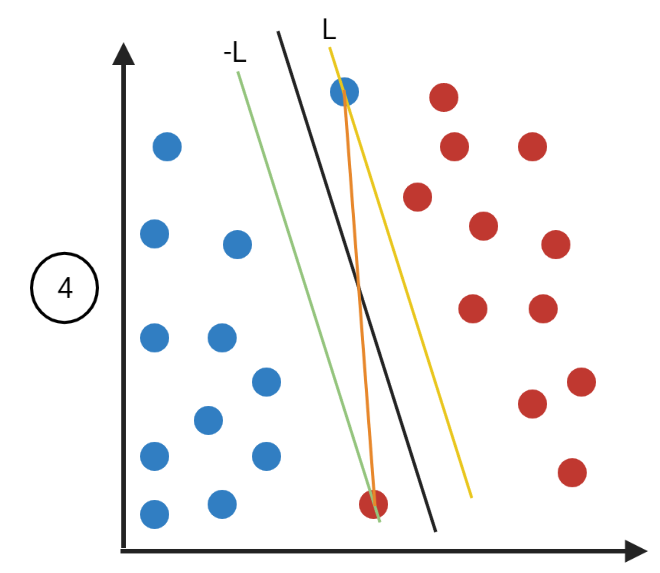
</div>

### Step 2

So what we have is the distance between the two margin and we want to maximize the distance between the closest two points on our graph. This is a optimization problem and we can solve this one by using lagrange multipliers. The method basically helps us to find local extreme values of a function as we discuessed it above. Let's formally define the formula and see how we use it for maximizing the margin.

Formally, we want to:

 $$w=arg_wmax\left(\frac{min_n\:y_n\left|w^Tx+b\right|}{\left|\left|w\right|\right|}\:\right)$$
 
If we set the distance of the closest point to 1 we can change this equation in the following way

$$w=arg_wmax\left(\frac{1}{\left|\left|w\right|\right|_2}\:\right),\:where\:\:min_n\:y_n\left|w^Tx+b\right|=1$$


### Step 3 - Primal Problem of Support Vector Machines
As we discussed previously here we will use the lagrange multipliers in order to minimize w and b.

**Formal Definition:** $Minimize\:\frac{\left|\left|w\right|\right|^2}{2}\:such\:that\:every\:point\:satisfies\:L-y_n\left(w^Tx_n+b\right)\le 0$


At this point, it is also good to change the notation a bit because there is a general notation for the distance. Firstly Maximizing $\frac{2L}{\left|\left|w\right|\right|}$ is the same as minimizing $\frac{\left|\left|w\right|\right|}{2}$. Moreover, generally we denote this distance by the Greek letter phi and write the equation as 

$$\phi \:\left(w\right)=\frac{1}{2}w^Tw$$

Here we almost change nothing, just say that w is a function of phi. By using the version denoted by phi we can derive the primal problem of SVM as follows:

$$min_{w,b}\left(\phi \:\left(w\right)\right)=min_{w,b}\left(\frac{1}{2}w^Tw\right)$$


Subject to

$$y_n\left(w^Tx_n+b\right)\ge 1,\:n=1,2,3,...,l$$


Now it comes to the mind-blowing part. Do you remember the Lagrangian Function that I introduced ? We can use the Lagrangian function and write primal problem as 

$$Lagrange function: L_p\left(w,b,\lambda _n\:\right)=\frac{1}{2}w^Tw\:-\sum_n\:\lambda _n\left(y_n\left(w^Tx_n+b\right)-1\right)$$

Here p indicates that it is the primal form of the problem and $\lambda$ is our Lagrange multiplier. Here we have $w\:and\:b$  which are our primal variables and $\lambda$ is our dual variable. For primal solution, we will minimize this function. To do that we need to derivate the function with respect to w and b, set them to zero so that we get optimial solutions.

$$\frac{\partial L}{\partial w}=\frac{\partial L_1}{\partial w}\frac{\partial L_2}{\partial w}\:where\:L_1=\left|\left|w\right|\right|and \: L_2=\sum_n \lambda _n\left(L-y_n\left(w^Tx_n+b\right)\right)$$

$$\frac{\partial L}{\partial w}=w-\sum_n\left(\lambda _ny_nx_n\right)$$

In the end for calculating weights we have the following equation.

$$w\:=\sum_n\left(\lambda _ny_nx_n\right)\:\:where\:\frac{\partial L}{\partial w}=0$$

And we can calculate intersection terms with the following equation

$$\frac{\partial L}{\partial b}=\frac{\partial L_1}{\partial b}\frac{\partial L_2}{\partial b}=0+\frac{\partial \:L_2}{\partial \:b}=\sum_n\left(\lambda \:_ny_n\right)=0\:$$

Here instead of minimizing with respect to w and b what we will do is to maximize with respect to $\lambda_n$ by using duality of this function, that is called dual problem of SVM. Maximizing $\lambda_n$ is a faster way of solving this optimization problem and in both case we get the same result. However, dual form lets us use something called kernel trick that I will introduce in the next notebook.

### Step 4: Dual Problem of Support Vector Machines

Now let's derive the Dual Formulation.

We know the Lagrange Function of Primal form

$$L_p\left(w,b,\lambda _n\:\right)=\frac{1}{2}w^Tw\:-\sum_n\:\lambda _n\left(y_n\left(w^Tx_n+b\right)-1\right)$$

when we do the multiplication we get

$$L_p\left(w,b,\lambda \:_n\:\right)=\frac{1}{2}w^Tw\:-\sum _n\lambda \:_n\:y_nw^Tx_n-b\sum_n \:\lambda _n\:y_n+\sum _n\:\lambda \:\:_n$$

Now we will cancel out some terms and get dual formulation. When we were trying to find the solution for primal problem we get derivatives of Lagrangian Function with respect to w and b. When we set these two derivatives to zero we get two optimum conditions below.


$$Condition\:1:\:w\:=\sum _n\left(\lambda \:\:_n\:y_n\:x_n\right)\:$$


$$Condition\:2:\:\:\sum _n\left(\lambda \:_n\:y_n\right)=0\:$$

The third term in the primal formulation cancels out because of this condition 1 above. Moreover, we can also use condition 2 to express $\frac{1}{2}w^Tw$ in terms of $\lambda$,$y$ and $x$

$$\frac{1}{2}w^Tw\:=\:\sum _n\:\lambda \:_n\:y_nw^Tx_n=\sum _{n,j}\:\lambda \:_n\lambda _j\:y_n\:y_j\:x_n\:x_j$$


When we combine all of this into the primal formulation we get the dual formulation of SVM.

$$L_D\left(w,b,\lambda \right)=\sum_n\left(\lambda_n\right)-\frac{1}{2}\sum_n\sum_j\left(\lambda \:_n\lambda _jy_ny_j\left(x^T_nx_j\right)\right)$$

The dual formulation is subject to the two constrains below.

$$\sum_n\left(\lambda_ny_n\right)=0$$

$$\lambda_n>0\:for\:n=1,...,l$$

We need to find optimal Lagrange multipliers ($\lambda$) that maximizes dual form of SVM. There are some algorithms that can do this which are listed below.
1. Iterative Single Data Algorithm (ISDA)
2. L1 Soft-Margin Minimization by Quadratic Programming( L1QP)
3. Sequential Minimal optimization (SMO)

SMO is the most widely used solver for SVM, however, I prefer not to go into details of that solver but I will share a paper in which SMO algorithm is introduced.

Lastly, once we have alphas we can calculate w and b with the equations below.

$$\:w\:=\sum _n\left(\lambda _ny_nx_n\right)\:\:$$

$$b=\frac{1}{n}\sum _n\left(y_n-w^Tx_n\right)$$

**Additional sources:**
There is a very brief explanation of the optimization problem of SVM in this article [Mathematical Underpinnings: SVMs + Optimisation](https://towardsdatascience.com/mathematical-underpinnings-svms-optimisation-6495776215c3). Also ritvikmath has a good video about Dual Form [link](https://www.youtube.com/watch?v=6-ntMIaJpm0)

We are almost done with the mathematics behind SVM. There is another version of the algorithm above called Soft Margin SVM. Let's also go through that version to extend our idea of SVM.

### Some Important Notes about Formulation

#### 1. Soft Margin Classifier

**What are we going to do when the data cannot be seperated linearly ?**


In the illustrations above I showed an linearly seperable example but we need some ways to deal with situations like the one below. The procedure that I showed you above has a unique solution only if the data is linearly seperable, otherwise, constraints are not satisfied and we cannot use the algorithm. However, in real life it is very rare to find a data we can seperate perfectly.

<div>
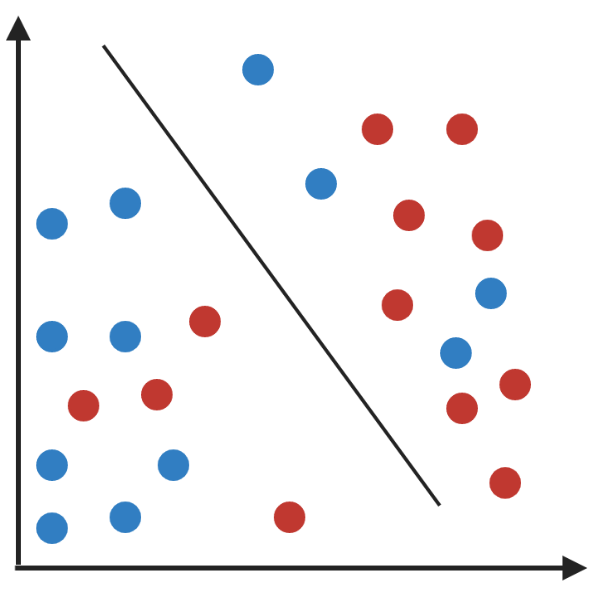
</div>

The formulation we went through is called Hard Margin Classifier which does not let points to violate the margin. However, there is a version of SVM which is called Soft Margin Classifier which lets the points to violate the margin. We do this by adding a slack variable to the constraints. 

* A slack variable is a decision variable introduced in an optimization problem to transform an inequality constraint into an equality constraint, possibly with a non negativity constraint 

$$y_n\left(w^Tx_n-b\right)\ge 1-\zeta _n$$

In the equation above Greek letter $\zeta _n$ is called slack variable. In this case the primal problem of SVM is 

$$min_{w,b,\zeta \:}\frac{1}{2}\left|\left|w\right|\right|_2+C\sum _n\left(\zeta \:^{\left(n\right)}\right)\:where\:y_n\left[w^Tx+b\ge 1-\zeta \:\right],\:\zeta \:^{\left(i\right)}>0,\:n=1,2,....,m\:$$

Subject to

$$y_n\left(w^Tx_n-b\right)\ge 1-\zeta _n$$
$$\zeta _n>0$$

Here if C is relatively low we let less complex boundary and if it is relatively high we don't permit missclasification by penalizing even small slacks. In other words, we can think of C as an regularization parameter. We can tune it by using GridSearch or RandomSearch. If C is small we penalize less the points that violate the margin, if it is big we penalize more the points that violate the margin. Let's also look at how dual problem changes in Soft Margin Classification.

$$L_D\left(w,b,\lambda \right)=\sum_n\left(\lambda_n\right)-\frac{1}{2}\sum_n\sum_j\left(\lambda \:_n\lambda \:_jy_ny_j\left(x^T_nx_j\right)\right)$$


The soft margin dual formulation is subject to the two constrains below.

$$\sum_n\left(\lambda_ny_n\right)=0$$

$$0\:\le \lambda _n\:\le C\:for\:n=1,...,l$$

The slack variable doesn't appear in the dual formulation, instead we only have C in the second constraint which sometimes also called box constraint because it constraints lambda values.

You can find more about formulation of Soft Max SVM in the following papers.

1. [Introduction to Machine Learning](https://www.eecs189.org/static/notes/n20.pdf)
2. [Kernel SVM for Image Classification](http://www.nathanielhobbs.com/documents/cvx_opt/cvx_opt_final_report.pdf)
3. [Soft Margin SVM](https://people.eecs.berkeley.edu/~jordan/courses/281B-spring04/lectures/lec6.pdf)
4. [Support Vector Machines](http://www.cs.cmu.edu/~mgormley/courses/10601bd-f18/slides/lecture25-svm.pdf)

#### 2. Karush-Kuhn-Tucker (KKT) Conditions
There are some conditions called Karush-Kuhn-Tucker Conditions that must be satisfied in order to get optimal solution from both primal and dual problem. In other words, the primal and dual problem must satisfy some conditions to yield the same result.

$$\lambda _n\ge 0$$

$$y_n\left(w^Tx_n+b\right)\ge 1,$$

$$\lambda_n\left(y_n\left(w^{Tx}_n+b\right)-1\right)\ge 0$$

You can find more about these Conditions in the links: [link1](https://liyanxu.blog/2018/11/02/overview-svm-optimization/) and [link2](https://stats.stackexchange.com/questions/23391/how-does-a-support-vector-machine-svm-work/353605#353605)

Now there is concept that kernel trick which is used to project the data we have to a higher dimension for getting a better seperation, however, I will introduce this step in the following notebook and focus on some applications and how we can use SVM on Python. 

# Linear SVM

There are a couple of functions that we can use to implement SVM on Python. We will go one by one and explore all of them. In this notebook I will show how to implement Linear SVM. 

## Linear SVC
Let's start with Linear Support Vector Machines Classifier. 

Let's explore some important parameters of Linear SVM.

**1. dual:** In Linear SVM we can use both the primal and dual formulation. By default dual is set to true. You can find the more about formulation of SVM in LinearSVM function in the [documentation](https://scikit-learn.org/stable/modules/svm.html#svm-mathematical-formulation)


**2. loss:** Above I showed you the primal and dual formulation of SVM. In addition to that, the functions seems like does not have any term that takes into account the classification error. Well it actually does which is defined as $ξ_n=0\:$ if points are correctly classified and $ξ_n=1-y_n\left(w^T\phi \:\left(x_n\right)+b\right)$ if points are classified wrongly. We can combine this conditions into one loss function and this loss function is called Hinge loss which is defined as

$$\sum _{n=1}max\left(0,1-y_n\left(w^T\phi \left(x_n\right)+b\right)\right)\:$$

   We can use the hinge loss in the primal form of Soft Margin Classifier as follows.

$$min_{w,b\:\:}\frac{1}{2}w^Tw+C\sum_{n=1}max\left(0,1-y_n\left(w^T\phi \:\left(x_n\right)+b\right)\right)\:$$

   We actually have nothing new here because If you put the terms for $ξ_n$ in the representations I showed earlier you get the same thing. However, this is a more formal definition and I wanted to show it here.Moreover, you can find more about Hinge loss in the following articles.
   
1. [Support Vector Machine — Introduction to Machine Learning Algorithms](https://towardsdatascience.com/support-vector-machine-introduction-to-machine-learning-algorithms-934a444fca47)
2. [Understanding Hinge Loss and the SVM Cost Function](https://programmathically.com/understanding-hinge-loss-and-the-svm-cost-function/#:~:text=The%20hinge%20loss%20is%20a,boundary%20is%20not%20large%20enough.)

Linear SVC also provides us to use squared version of this loss function.
   
**3. penality:** We can use l1 and l2 regularization terms with Linear SVC. L1 term only can be used with squared hinge loss.


**4. C:** We can also tune the term C in soft margin classifier version.

I recommend checking the documentation of function for other parameters [link](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC)

FINALLY let's use the classifier.

## Binary Classification with SVC

In [2]:
from sklearn.datasets import load_breast_cancer
data_bc = load_breast_cancer()

I will not go into details of the dataset since we already talked about it in Logistic Regression Notebooks. Let's get our predictors and target.

In [3]:
predictors = pd.DataFrame(data=data_bc.data, columns=data_bc.feature_names)
predictors.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
target= data_bc["target"]

Let's use train and test split. I will also use data stratification.

In [5]:
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size = 0.2, random_state = 42,stratify=target)

In [6]:
from sklearn.svm import LinearSVC
linear_scv=LinearSVC()

In [7]:
params = {
    'C':[0.25,0,50,0.75,1],
    'penalty': ["l2","l1"],
    'loss': ["hinge","squared_hinge"],
    'fit_intercept':[True,False],
    'dual':[True,False],
    
}

In [8]:
gscv=GridSearchCV(linear_scv, params, cv=5,verbose=2,scoring="accuracy")

Remember when cv=5 means we use StratifiedKFold with 5 folds.

In [9]:
model=gscv.fit(X_train,y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
[CV] END C=0.25, dual=True, fit_intercept=True, loss=hinge, penalty=l2; total time=   0.0s
[CV] END C=0.25, dual=True, fit_intercept=True, loss=hinge, penalty=l2; total time=   0.0s
[CV] END C=0.25, dual=True, fit_intercept=True, loss=hinge, penalty=l2; total time=   0.0s
[CV] END C=0.25, dual=True, fit_intercept=True, loss=hinge, penalty=l2; total time=   0.0s
[CV] END C=0.25, dual=True, fit_intercept=True, loss=hinge, penalty=l2; total time=   0.0s
[CV] END C=0.25, dual=True, fit_intercept=True, loss=hinge, penalty=l1; total time=   0.0s
[CV] END C=0.25, dual=True, fit_intercept=True, loss=hinge, penalty=l1; total time=   0.0s
[CV] END C=0.25, dual=True, fit_intercept=True, loss=hinge, penalty=l1; total time=   0.0s
[CV] END C=0.25, dual=True, fit_intercept=True, loss=hinge, penalty=l1; total time=   0.0s
[CV] END C=0.25, dual=True, fit_intercept=True, loss=hinge, penalty=l1; total time=   0.0s
[CV] END C=0.25, dual=True, 

[CV] END C=0, dual=True, fit_intercept=True, loss=squared_hinge, penalty=l1; total time=   0.0s
[CV] END C=0, dual=True, fit_intercept=True, loss=squared_hinge, penalty=l1; total time=   0.0s
[CV] END C=0, dual=True, fit_intercept=True, loss=squared_hinge, penalty=l1; total time=   0.0s
[CV] END C=0, dual=True, fit_intercept=True, loss=squared_hinge, penalty=l1; total time=   0.0s
[CV] END C=0, dual=True, fit_intercept=True, loss=squared_hinge, penalty=l1; total time=   0.0s
[CV] END C=0, dual=True, fit_intercept=False, loss=hinge, penalty=l2; total time=   0.0s
[CV] END C=0, dual=True, fit_intercept=False, loss=hinge, penalty=l2; total time=   0.0s
[CV] END C=0, dual=True, fit_intercept=False, loss=hinge, penalty=l2; total time=   0.0s
[CV] END C=0, dual=True, fit_intercept=False, loss=hinge, penalty=l2; total time=   0.0s
[CV] END C=0, dual=True, fit_intercept=False, loss=hinge, penalty=l2; total time=   0.0s
[CV] END C=0, dual=True, fit_intercept=False, loss=hinge, penalty=l1; total

[CV] END C=50, dual=True, fit_intercept=False, loss=squared_hinge, penalty=l2; total time=   0.0s
[CV] END C=50, dual=True, fit_intercept=False, loss=squared_hinge, penalty=l2; total time=   0.0s
[CV] END C=50, dual=True, fit_intercept=False, loss=squared_hinge, penalty=l2; total time=   0.0s
[CV] END C=50, dual=True, fit_intercept=False, loss=squared_hinge, penalty=l2; total time=   0.0s
[CV] END C=50, dual=True, fit_intercept=False, loss=squared_hinge, penalty=l1; total time=   0.0s
[CV] END C=50, dual=True, fit_intercept=False, loss=squared_hinge, penalty=l1; total time=   0.0s
[CV] END C=50, dual=True, fit_intercept=False, loss=squared_hinge, penalty=l1; total time=   0.0s
[CV] END C=50, dual=True, fit_intercept=False, loss=squared_hinge, penalty=l1; total time=   0.0s
[CV] END C=50, dual=True, fit_intercept=False, loss=squared_hinge, penalty=l1; total time=   0.0s
[CV] END C=50, dual=False, fit_intercept=True, loss=hinge, penalty=l2; total time=   0.0s
[CV] END C=50, dual=False, f

[CV] END C=0.75, dual=False, fit_intercept=True, loss=squared_hinge, penalty=l2; total time=   0.0s
[CV] END C=0.75, dual=False, fit_intercept=True, loss=squared_hinge, penalty=l2; total time=   0.0s
[CV] END C=0.75, dual=False, fit_intercept=True, loss=squared_hinge, penalty=l1; total time=   0.0s
[CV] END C=0.75, dual=False, fit_intercept=True, loss=squared_hinge, penalty=l1; total time=   0.0s
[CV] END C=0.75, dual=False, fit_intercept=True, loss=squared_hinge, penalty=l1; total time=   0.0s
[CV] END C=0.75, dual=False, fit_intercept=True, loss=squared_hinge, penalty=l1; total time=   0.0s
[CV] END C=0.75, dual=False, fit_intercept=True, loss=squared_hinge, penalty=l1; total time=   0.0s
[CV] END C=0.75, dual=False, fit_intercept=False, loss=hinge, penalty=l2; total time=   0.0s
[CV] END C=0.75, dual=False, fit_intercept=False, loss=hinge, penalty=l2; total time=   0.0s
[CV] END C=0.75, dual=False, fit_intercept=False, loss=hinge, penalty=l2; total time=   0.0s
[CV] END C=0.75, dual

In [10]:
y_pred=model.predict(X_test)

In [11]:
accuracy_score(y_pred,y_test)

0.9824561403508771

Wow accuracy is extremely high (remember we got 0.89 when we used logistic regression). Let's also use some other metrics to see whether or not the model performs that good. To do that, I will use the `plot_confusion()` and `plot_precisionvsrecall()` functions that we defined in logistic regression notebooks (I use precision-vs-recall curve because we have imbalance).

In [12]:
def plot_confusion(y,y_pred):
    if isinstance(y_pred, (np.ndarray)):
        plt.figure(figsize=(10, 7))
        cm=confusion_matrix(y, y_pred)
        
        plt.figure(figsize=(10, 7))
        group_names =['TN','FS','FN','TP']
        
        group_counts = ['{0:0.0f}'.format(value) for value in cm.flatten()]
        group_percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]

        labels = [f'{v1}\n\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
        labels = np.asarray(labels).reshape(2,2)
    
        sns.heatmap(cm, annot=labels, fmt='', cmap='mako',annot_kws={"fontsize":20})

    else:
        
        f, axes = plt.subplots(1, 3,figsize=(18,5))
        for i in range(3):
            cm=confusion_matrix(y, y_pred[i])
            plt.figure(figsize=(10, 7))
            group_names =['TN','FS','FN','TP']
            group_counts = ['{0:0.0f}'.format(value) for value in cm.flatten()]
            group_percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
            labels = [f'{v1}\n\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
            labels = np.asarray(labels).reshape(2,2)
            sns.heatmap(cm, annot=labels, fmt='', cmap='mako',annot_kws={"fontsize":20},ax=axes[i])

In [13]:
def plot_precisionvsrecall(y,y_pred):
    if isinstance(y_pred, (np.ndarray)):
        plt.figure(figsize=(10, 7))
        precisions, recalls, thresholds = precision_recall_curve(y, y_pred)
        sns.set_style("darkgrid")
        ax=sns.lineplot(x=precisions, y=recalls ,linewidth = 2)
        ax.set_xlabel("Precision",fontsize=15)
        ax.set_ylabel("Recall",fontsize=15)
        ax.text(0.7 * (0.25 + 0.25+ 0.5), 0.61 * (0.25 + 0.25+ 0.5), 'AUC=%.3f' % auc(recalls, precisions),size=14)
        ax.text(0.7 * (0.25 + 0.25+ 0.5), 0.41 * (0.25 + 0.25+ 0.5), 'F1-Score =%.3f' % f1_score(y, y_pred),size=14)
        
    else: 
        f, axes = plt.subplots(1, 3,figsize=(17,5))
        for i in range(3):
            precisions, recalls, thresholds = precision_recall_curve(y, y_pred[i])
            sns.set_style("darkgrid")
            ax=sns.lineplot(x=precisions, y=recalls ,ax=axes[i],linewidth = 2)
            ax.set_xlabel("Precision",fontsize=15)
            ax.set_ylabel("Recall",fontsize=15)
            ax.text(0.7 * (0.25 + 0.25+ 0.5), 0.84 * (0.25 + 0.25+ 0.5), 'AUC=%.3f' % auc(recalls, precisions),size=14)
            ax.text(0.3 * (0.25 + 0.25+ 0.5), 0.22 * (0.25 + 0.25+ 0.5), 'F1-Score =%.3f' % f1_score(y, y_pred[i]),size=14)

<Figure size 720x504 with 0 Axes>

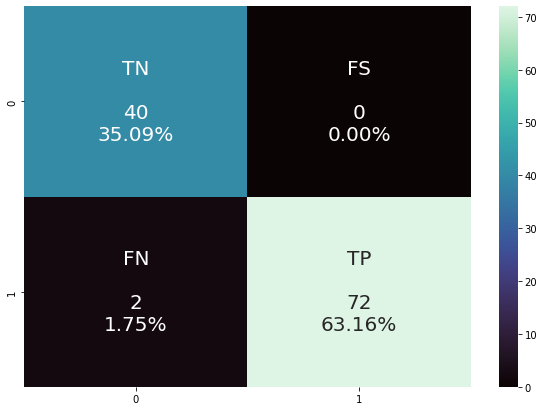

In [14]:
plot_confusion(y_pred,y_test)

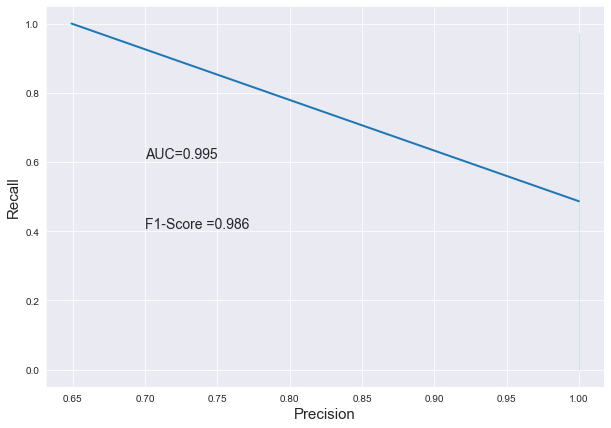

In [15]:
plot_precisionvsrecall(y_pred,y_test)

The algorithm really performs very well on this dataset. This is not an unexpected thing actually since we are only using a toy dataset. Let's also explore some others things we can do with the algorithm.

Do you remember the plotting decision boundary example in Logistic Regression notebooks ? Let's use the code there to create a new function and plot the decision boundary. I will use the best parameters estimated in GridSearchCV, so let's firstly get these parameters.

In [16]:
gscv.best_params_

{'C': 50,
 'dual': False,
 'fit_intercept': True,
 'loss': 'squared_hinge',
 'penalty': 'l1'}

Okay now I will combine the code in the logistic regression notebook into a function.

In [17]:
def plot_decisionboundary(model):
    X= np.transpose(predictors[["mean perimeter","mean texture"]])
    y= data_bc["target"]
    best_scv = LinearSVC(C=50, random_state=42, penalty='l1',loss="squared_hinge",dual=False,fit_intercept=True) # fitting the model with best parameters
    model_best=best_scv.fit(X.T,y)
    predicted_class=best_scv.predict(X.T)
    w_0=model_best.coef_[:,0]
    w_1=model_best.coef_[:,1]
    bias = model_best.intercept_
    if(model=="predicted"):
        f, ax = plt.subplots(figsize=(10, 8))
        sns.scatterplot(x=X.loc["mean perimeter"],y=X.loc["mean texture"],hue=predicted_class)
        decision_boundary=-(bias+(w_0)*X.loc["mean perimeter"])/(w_1)
        plt.plot(X.loc["mean perimeter"],decision_boundary)
        plt.ylim(0, 45)
    elif(model=="target"):
        sns.set_theme()
        f, ax = plt.subplots(figsize=(10, 8))
        sns.scatterplot(x=X.loc["mean perimeter"],y=X.loc["mean texture"],hue=y)
        decision_boundary=-(bias+(w_0)*X.loc["mean perimeter"])/(w_1)
        plt.plot(X.loc["mean perimeter"],decision_boundary)
        plt.ylim(0, 45)

When I set model to "target", labels will be the one in the dataset, in other words, our target labels. Otherwise, labels will be our predicted classes, this time you can see that above the decision boundary every class has assigned to 0

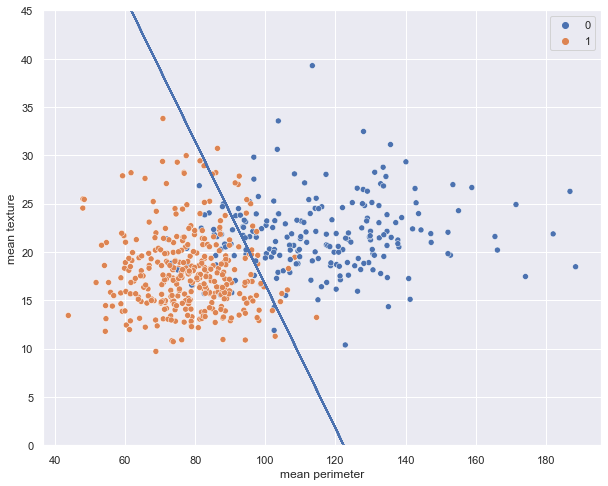

In [18]:
plot_decisionboundary("target")

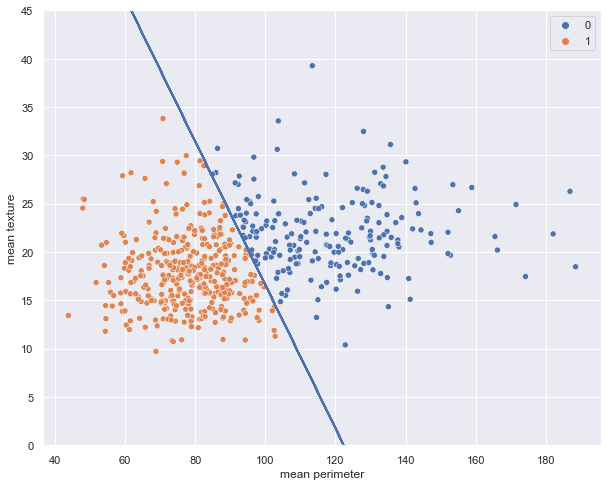

In [19]:
plot_decisionboundary("predicted")

Just before uploading this notebook onto Github, I found a very nice MachineLearningMastery article about plotting decision boundary and I wanted to try this out. I slightly changed the last part of the code but it is almost the same as the code in the [article](https://machinelearningmastery.com/plot-a-decision-surface-for-machine-learning/). 

C:\Users\gorke\AppData\Local\Temp\ipykernel_3456\4021783714.py:37: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  pyplot.colorbar(c)


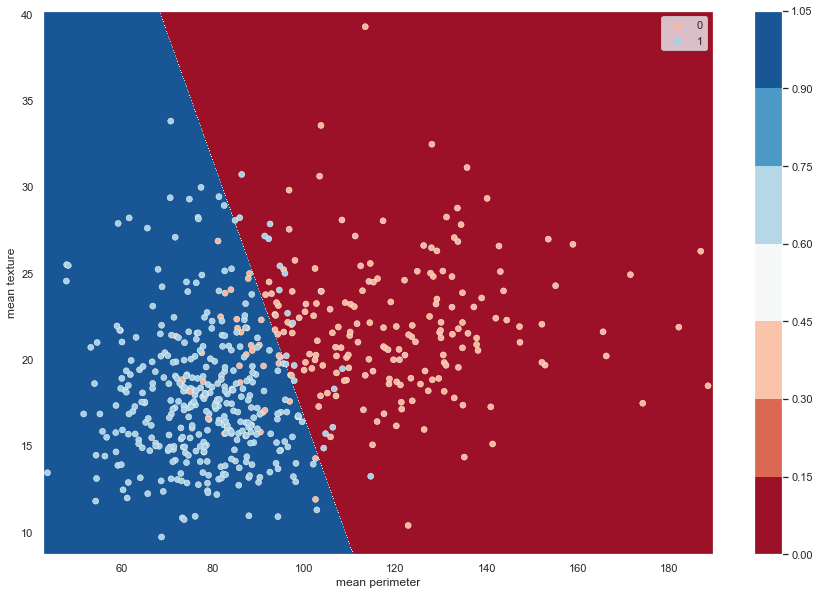

In [54]:
from numpy import where
from numpy import meshgrid
from numpy import arange
from numpy import hstack
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
# generate dataset
sns.set_theme()
X =predictors[["mean perimeter","mean texture"]]
y=data_bc["target"]
# define bounds of the domain
min1, max1 = X.iloc[:, 0].min()-1, X.iloc[:, 0].max()+1
min2, max2 = X.iloc[:, 1].min()-1, X.iloc[:, 1].max()+1
# define the x and y scale
x1grid = arange(min1, max1, 0.1)
x2grid = arange(min2, max2, 0.1)
# create all of the lines and rows of the grid
xx, yy = meshgrid(x1grid, x2grid)
# flatten each grid to a vector
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
# horizontal stack vectors to create x1,x2 input for the model
grid = hstack((r1,r2))
# define the model
model = LinearSVC(C=50, random_state=42, penalty='l1',loss="squared_hinge",dual=False,fit_intercept=True)
# fit the model
model.fit(X, y)
# make predictions for the grid
yhat = model.predict(grid)
# keep just the probabilities for class 0

zz = yhat.reshape(xx.shape)
# plot the grid of x, y and z values as a surface
c = pyplot.contourf(xx, yy, zz, cmap='RdBu')
# add a legend, called a color bar
pyplot.colorbar(c)
# create scatter plot for samples from each class
sns.set(rc={'figure.figsize':(15,10)})
plt=sns.scatterplot(x=X.iloc[:,0],y=X.iloc[:,1],hue=y,palette='RdBu')


## Multiclass Classification with SVC

Let's also explore how to apply multiclass classification with LinearSVC. I will use iris flower dataset for multiclass example. 

In [131]:
from sklearn import datasets
iris = datasets.load_iris()

In [132]:
predictors = pd.DataFrame(data=iris.data, columns=iris.feature_names)
predictors.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [165]:
target= iris["target"]
np.unique(target)# let's also see the classes

array([0, 1, 2])

We loaded the datasets. let's now use `train_test_split()` again to divide the dataset.

In [134]:
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size = 0.2, random_state = 42,stratify=target)

Now I will use `linearSVC()` and `GridSearchCV()`. SVC doesn't have a multinomial implementation, however, we can again use strategies such as One-vs-Rest or One-vs-One approach. By default, the approach we can use with SVC is One-vs-Rest strategy, therefore, I will specify multi_class parameter to ovr. And the rest will be the same as the code above.

In [178]:
linear_svc=LinearSVC(multi_class="ovr")

In [179]:
params = {
    'C':[0.25,0,50,0.75,1],
    'penalty': ["l2","l1"],
    'loss': ["hinge","squared_hinge"],
    'fit_intercept':[True,False],
    'dual':[True,False],
    
}

In [180]:
gscv=GridSearchCV(linear_svc, params, cv=5,verbose=2,scoring="accuracy")

In [181]:
model=gscv.fit(X_train,y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
[CV] END C=0.25, dual=True, fit_intercept=True, loss=hinge, penalty=l2; total time=   0.0s
[CV] END C=0.25, dual=True, fit_intercept=True, loss=hinge, penalty=l2; total time=   0.0s
[CV] END C=0.25, dual=True, fit_intercept=True, loss=hinge, penalty=l2; total time=   0.0s
[CV] END C=0.25, dual=True, fit_intercept=True, loss=hinge, penalty=l2; total time=   0.0s
[CV] END C=0.25, dual=True, fit_intercept=True, loss=hinge, penalty=l2; total time=   0.0s
[CV] END C=0.25, dual=True, fit_intercept=True, loss=hinge, penalty=l1; total time=   0.0s
[CV] END C=0.25, dual=True, fit_intercept=True, loss=hinge, penalty=l1; total time=   0.0s
[CV] END C=0.25, dual=True, fit_intercept=True, loss=hinge, penalty=l1; total time=   0.0s
[CV] END C=0.25, dual=True, fit_intercept=True, loss=hinge, penalty=l1; total time=   0.0s
[CV] END C=0.25, dual=True, fit_intercept=True, loss=hinge, penalty=l1; total time=   0.0s
[CV] END C=0.25, dual=True, 

[CV] END C=0, dual=True, fit_intercept=True, loss=hinge, penalty=l1; total time=   0.0s
[CV] END C=0, dual=True, fit_intercept=True, loss=hinge, penalty=l1; total time=   0.0s
[CV] END C=0, dual=True, fit_intercept=True, loss=hinge, penalty=l1; total time=   0.0s
[CV] END C=0, dual=True, fit_intercept=True, loss=squared_hinge, penalty=l2; total time=   0.0s
[CV] END C=0, dual=True, fit_intercept=True, loss=squared_hinge, penalty=l2; total time=   0.0s
[CV] END C=0, dual=True, fit_intercept=True, loss=squared_hinge, penalty=l2; total time=   0.0s
[CV] END C=0, dual=True, fit_intercept=True, loss=squared_hinge, penalty=l2; total time=   0.0s
[CV] END C=0, dual=True, fit_intercept=True, loss=squared_hinge, penalty=l2; total time=   0.0s
[CV] END C=0, dual=True, fit_intercept=True, loss=squared_hinge, penalty=l1; total time=   0.0s
[CV] END C=0, dual=True, fit_intercept=True, loss=squared_hinge, penalty=l1; total time=   0.0s
[CV] END C=0, dual=True, fit_intercept=True, loss=squared_hinge,

[CV] END C=50, dual=True, fit_intercept=False, loss=hinge, penalty=l1; total time=   0.0s
[CV] END C=50, dual=True, fit_intercept=False, loss=hinge, penalty=l1; total time=   0.0s
[CV] END C=50, dual=True, fit_intercept=False, loss=hinge, penalty=l1; total time=   0.0s
[CV] END C=50, dual=True, fit_intercept=False, loss=squared_hinge, penalty=l2; total time=   0.0s
[CV] END C=50, dual=True, fit_intercept=False, loss=squared_hinge, penalty=l2; total time=   0.0s
[CV] END C=50, dual=True, fit_intercept=False, loss=squared_hinge, penalty=l2; total time=   0.0s
[CV] END C=50, dual=True, fit_intercept=False, loss=squared_hinge, penalty=l2; total time=   0.0s
[CV] END C=50, dual=True, fit_intercept=False, loss=squared_hinge, penalty=l2; total time=   0.0s
[CV] END C=50, dual=True, fit_intercept=False, loss=squared_hinge, penalty=l1; total time=   0.0s
[CV] END C=50, dual=True, fit_intercept=False, loss=squared_hinge, penalty=l1; total time=   0.0s
[CV] END C=50, dual=True, fit_intercept=Fals

[CV] END C=0.75, dual=True, fit_intercept=False, loss=squared_hinge, penalty=l1; total time=   0.0s
[CV] END C=0.75, dual=True, fit_intercept=False, loss=squared_hinge, penalty=l1; total time=   0.0s
[CV] END C=0.75, dual=True, fit_intercept=False, loss=squared_hinge, penalty=l1; total time=   0.0s
[CV] END C=0.75, dual=True, fit_intercept=False, loss=squared_hinge, penalty=l1; total time=   0.0s
[CV] END C=0.75, dual=True, fit_intercept=False, loss=squared_hinge, penalty=l1; total time=   0.0s
[CV] END C=0.75, dual=False, fit_intercept=True, loss=hinge, penalty=l2; total time=   0.0s
[CV] END C=0.75, dual=False, fit_intercept=True, loss=hinge, penalty=l2; total time=   0.0s
[CV] END C=0.75, dual=False, fit_intercept=True, loss=hinge, penalty=l2; total time=   0.0s
[CV] END C=0.75, dual=False, fit_intercept=True, loss=hinge, penalty=l2; total time=   0.0s
[CV] END C=0.75, dual=False, fit_intercept=True, loss=hinge, penalty=l2; total time=   0.0s
[CV] END C=0.75, dual=False, fit_interce

[CV] END C=1, dual=False, fit_intercept=True, loss=hinge, penalty=l1; total time=   0.0s
[CV] END C=1, dual=False, fit_intercept=True, loss=hinge, penalty=l1; total time=   0.0s
[CV] END C=1, dual=False, fit_intercept=True, loss=squared_hinge, penalty=l2; total time=   0.0s
[CV] END C=1, dual=False, fit_intercept=True, loss=squared_hinge, penalty=l2; total time=   0.0s
[CV] END C=1, dual=False, fit_intercept=True, loss=squared_hinge, penalty=l2; total time=   0.0s
[CV] END C=1, dual=False, fit_intercept=True, loss=squared_hinge, penalty=l2; total time=   0.0s
[CV] END C=1, dual=False, fit_intercept=True, loss=squared_hinge, penalty=l2; total time=   0.0s
[CV] END C=1, dual=False, fit_intercept=True, loss=squared_hinge, penalty=l1; total time=   0.0s
[CV] END C=1, dual=False, fit_intercept=True, loss=squared_hinge, penalty=l1; total time=   0.0s
[CV] END C=1, dual=False, fit_intercept=True, loss=squared_hinge, penalty=l1; total time=   0.0s
[CV] END C=1, dual=False, fit_intercept=True, 

In [182]:
y_pred=model.predict(X_test)

In [183]:
accuracy_score(y_pred,y_test)

0.9666666666666667

That is a good result but accuracy may be deceiving again. When we were dealing with multiclass classification in Logistic Regression, we defined a function to plot Precision-vs-Recall and ROC Curve for multiclass case. Let's use a part of this function to get micro average precision-vs-recall AUC.

In [184]:
def avgprevsrecallAUC(y_predicted):
    y_score=label_binarize(y_predicted, classes=[0, 1, 2])
    y_test_binarized=label_binarize(y_test, classes=[0, 1, 2])
    n_classes = y_score.shape[1]
    precision = dict()
    prevsrec_auc=dict()
    recall = dict()
    th = dict()
    precision["micro"], recall["micro"], th["micro"] = precision_recall_curve(y_test_binarized.ravel(), y_score.ravel())
    prevsrec_auc["micro"] = auc(recall["micro"], precision["micro"])
    return prevsrec_auc["micro"]

In [185]:
avgprevsrecallAUC(y_pred)

0.9722222222222222

Okay looks like the algorithm really performs good. Let's also use One-vs-One strategy with SVC.

### One-vs-One Approach for Multiclass Classification

We can still use One-vs-One approach by using the function `OneVsOneClassifier()` just like we used `OneVsRestClassifier()` for Logistic Regression. 

In [186]:
from sklearn.multiclass import OneVsOneClassifier

In [187]:
model_onevsone=OneVsOneClassifier(linear_svc)

Remember that to optimize the parameters we need to add **estimator__** to specify that we are using gridsearch for estimator

In [188]:
params = {
    'estimator__C':[0.25,0,50,0.75,1],
    'estimator__penalty': ["l2","l1"],
    'estimator__loss': ["hinge","squared_hinge"],
    'estimator__fit_intercept':[True,False],
    'estimator__dual':[True,False],
    
}

In [189]:
gscv_ovo=GridSearchCV(model_onevsone, params, cv=5,verbose=2,scoring="accuracy")

In [190]:
model=gscv_ovo.fit(X_train,y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
[CV] END estimator__C=0.25, estimator__dual=True, estimator__fit_intercept=True, estimator__loss=hinge, estimator__penalty=l2; total time=   0.0s
[CV] END estimator__C=0.25, estimator__dual=True, estimator__fit_intercept=True, estimator__loss=hinge, estimator__penalty=l2; total time=   0.0s
[CV] END estimator__C=0.25, estimator__dual=True, estimator__fit_intercept=True, estimator__loss=hinge, estimator__penalty=l2; total time=   0.0s
[CV] END estimator__C=0.25, estimator__dual=True, estimator__fit_intercept=True, estimator__loss=hinge, estimator__penalty=l2; total time=   0.0s
[CV] END estimator__C=0.25, estimator__dual=True, estimator__fit_intercept=True, estimator__loss=hinge, estimator__penalty=l2; total time=   0.0s
[CV] END estimator__C=0.25, estimator__dual=True, estimator__fit_intercept=True, estimator__loss=hinge, estimator__penalty=l1; total time=   0.0s
[CV] END estimator__C=0.25, estimator__dual=True, estimator__f

[CV] END estimator__C=0.25, estimator__dual=False, estimator__fit_intercept=False, estimator__loss=hinge, estimator__penalty=l1; total time=   0.0s
[CV] END estimator__C=0.25, estimator__dual=False, estimator__fit_intercept=False, estimator__loss=hinge, estimator__penalty=l1; total time=   0.0s
[CV] END estimator__C=0.25, estimator__dual=False, estimator__fit_intercept=False, estimator__loss=hinge, estimator__penalty=l1; total time=   0.0s
[CV] END estimator__C=0.25, estimator__dual=False, estimator__fit_intercept=False, estimator__loss=squared_hinge, estimator__penalty=l2; total time=   0.0s
[CV] END estimator__C=0.25, estimator__dual=False, estimator__fit_intercept=False, estimator__loss=squared_hinge, estimator__penalty=l2; total time=   0.0s
[CV] END estimator__C=0.25, estimator__dual=False, estimator__fit_intercept=False, estimator__loss=squared_hinge, estimator__penalty=l2; total time=   0.0s
[CV] END estimator__C=0.25, estimator__dual=False, estimator__fit_intercept=False, estim

[CV] END estimator__C=0, estimator__dual=False, estimator__fit_intercept=True, estimator__loss=squared_hinge, estimator__penalty=l2; total time=   0.0s
[CV] END estimator__C=0, estimator__dual=False, estimator__fit_intercept=True, estimator__loss=squared_hinge, estimator__penalty=l2; total time=   0.0s
[CV] END estimator__C=0, estimator__dual=False, estimator__fit_intercept=True, estimator__loss=squared_hinge, estimator__penalty=l2; total time=   0.0s
[CV] END estimator__C=0, estimator__dual=False, estimator__fit_intercept=True, estimator__loss=squared_hinge, estimator__penalty=l2; total time=   0.0s
[CV] END estimator__C=0, estimator__dual=False, estimator__fit_intercept=True, estimator__loss=squared_hinge, estimator__penalty=l1; total time=   0.0s
[CV] END estimator__C=0, estimator__dual=False, estimator__fit_intercept=True, estimator__loss=squared_hinge, estimator__penalty=l1; total time=   0.0s
[CV] END estimator__C=0, estimator__dual=False, estimator__fit_intercept=True, estimator

[CV] END estimator__C=50, estimator__dual=True, estimator__fit_intercept=False, estimator__loss=hinge, estimator__penalty=l1; total time=   0.0s
[CV] END estimator__C=50, estimator__dual=True, estimator__fit_intercept=False, estimator__loss=squared_hinge, estimator__penalty=l2; total time=   0.0s
[CV] END estimator__C=50, estimator__dual=True, estimator__fit_intercept=False, estimator__loss=squared_hinge, estimator__penalty=l2; total time=   0.0s
[CV] END estimator__C=50, estimator__dual=True, estimator__fit_intercept=False, estimator__loss=squared_hinge, estimator__penalty=l2; total time=   0.0s
[CV] END estimator__C=50, estimator__dual=True, estimator__fit_intercept=False, estimator__loss=squared_hinge, estimator__penalty=l2; total time=   0.0s
[CV] END estimator__C=50, estimator__dual=True, estimator__fit_intercept=False, estimator__loss=squared_hinge, estimator__penalty=l2; total time=   0.0s
[CV] END estimator__C=50, estimator__dual=True, estimator__fit_intercept=False, estimator_

[CV] END estimator__C=0.75, estimator__dual=True, estimator__fit_intercept=True, estimator__loss=squared_hinge, estimator__penalty=l1; total time=   0.0s
[CV] END estimator__C=0.75, estimator__dual=True, estimator__fit_intercept=True, estimator__loss=squared_hinge, estimator__penalty=l1; total time=   0.0s
[CV] END estimator__C=0.75, estimator__dual=True, estimator__fit_intercept=False, estimator__loss=hinge, estimator__penalty=l2; total time=   0.0s
[CV] END estimator__C=0.75, estimator__dual=True, estimator__fit_intercept=False, estimator__loss=hinge, estimator__penalty=l2; total time=   0.0s
[CV] END estimator__C=0.75, estimator__dual=True, estimator__fit_intercept=False, estimator__loss=hinge, estimator__penalty=l2; total time=   0.0s
[CV] END estimator__C=0.75, estimator__dual=True, estimator__fit_intercept=False, estimator__loss=hinge, estimator__penalty=l2; total time=   0.0s
[CV] END estimator__C=0.75, estimator__dual=True, estimator__fit_intercept=False, estimator__loss=hinge,

[CV] END estimator__C=1, estimator__dual=True, estimator__fit_intercept=True, estimator__loss=hinge, estimator__penalty=l1; total time=   0.0s
[CV] END estimator__C=1, estimator__dual=True, estimator__fit_intercept=True, estimator__loss=hinge, estimator__penalty=l1; total time=   0.0s
[CV] END estimator__C=1, estimator__dual=True, estimator__fit_intercept=True, estimator__loss=hinge, estimator__penalty=l1; total time=   0.0s
[CV] END estimator__C=1, estimator__dual=True, estimator__fit_intercept=True, estimator__loss=hinge, estimator__penalty=l1; total time=   0.0s
[CV] END estimator__C=1, estimator__dual=True, estimator__fit_intercept=True, estimator__loss=hinge, estimator__penalty=l1; total time=   0.0s
[CV] END estimator__C=1, estimator__dual=True, estimator__fit_intercept=True, estimator__loss=squared_hinge, estimator__penalty=l2; total time=   0.0s
[CV] END estimator__C=1, estimator__dual=True, estimator__fit_intercept=True, estimator__loss=squared_hinge, estimator__penalty=l2; to

[CV] END estimator__C=1, estimator__dual=False, estimator__fit_intercept=False, estimator__loss=squared_hinge, estimator__penalty=l2; total time=   0.0s
[CV] END estimator__C=1, estimator__dual=False, estimator__fit_intercept=False, estimator__loss=squared_hinge, estimator__penalty=l2; total time=   0.0s
[CV] END estimator__C=1, estimator__dual=False, estimator__fit_intercept=False, estimator__loss=squared_hinge, estimator__penalty=l2; total time=   0.0s
[CV] END estimator__C=1, estimator__dual=False, estimator__fit_intercept=False, estimator__loss=squared_hinge, estimator__penalty=l2; total time=   0.0s
[CV] END estimator__C=1, estimator__dual=False, estimator__fit_intercept=False, estimator__loss=squared_hinge, estimator__penalty=l1; total time=   0.0s
[CV] END estimator__C=1, estimator__dual=False, estimator__fit_intercept=False, estimator__loss=squared_hinge, estimator__penalty=l1; total time=   0.0s
[CV] END estimator__C=1, estimator__dual=False, estimator__fit_intercept=False, es

In [191]:
y_pred=model.predict(X_test)

In [192]:
accuracy_score(y_pred,y_test)

1.0

One-vs-One strategy looks like performing better than One-vs-Rest strategy. Let's use the function that we created above to see the micro average precision-vs-recall AUC.

In [193]:
avgprevsrecallAUC(y_pred)

1.0